PRATEEK PARASHAR 

ASU ID : 1229631743

TASK 1

Q1

In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [16]:
file2 = pd.read_csv('train.csv')
file2['Age'].fillna(file2['Age'].median(), inplace=True)
file2['Embarked'].fillna(file2['Embarked'].mode()[0], inplace=True)
file2.drop('Cabin', axis=1, inplace=True)
file2 = pd.get_dummies(file2, columns=['Sex', 'Embarked'], drop_first=True)
file2.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
X = file2.drop('Survived', axis=1)
y = file2['Survived']
print("Data prep done")
print(f"Features shape X: {X.shape}")
print(f"Y shape ( target ): {y.shape}")
print("\nFeatures after processing:")
print(X.head())

Data prep done
Features shape X: (891, 8)
Y shape ( target ): (891,)

Features after processing:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


Q 2

Decision Tree parameters ( best ): {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


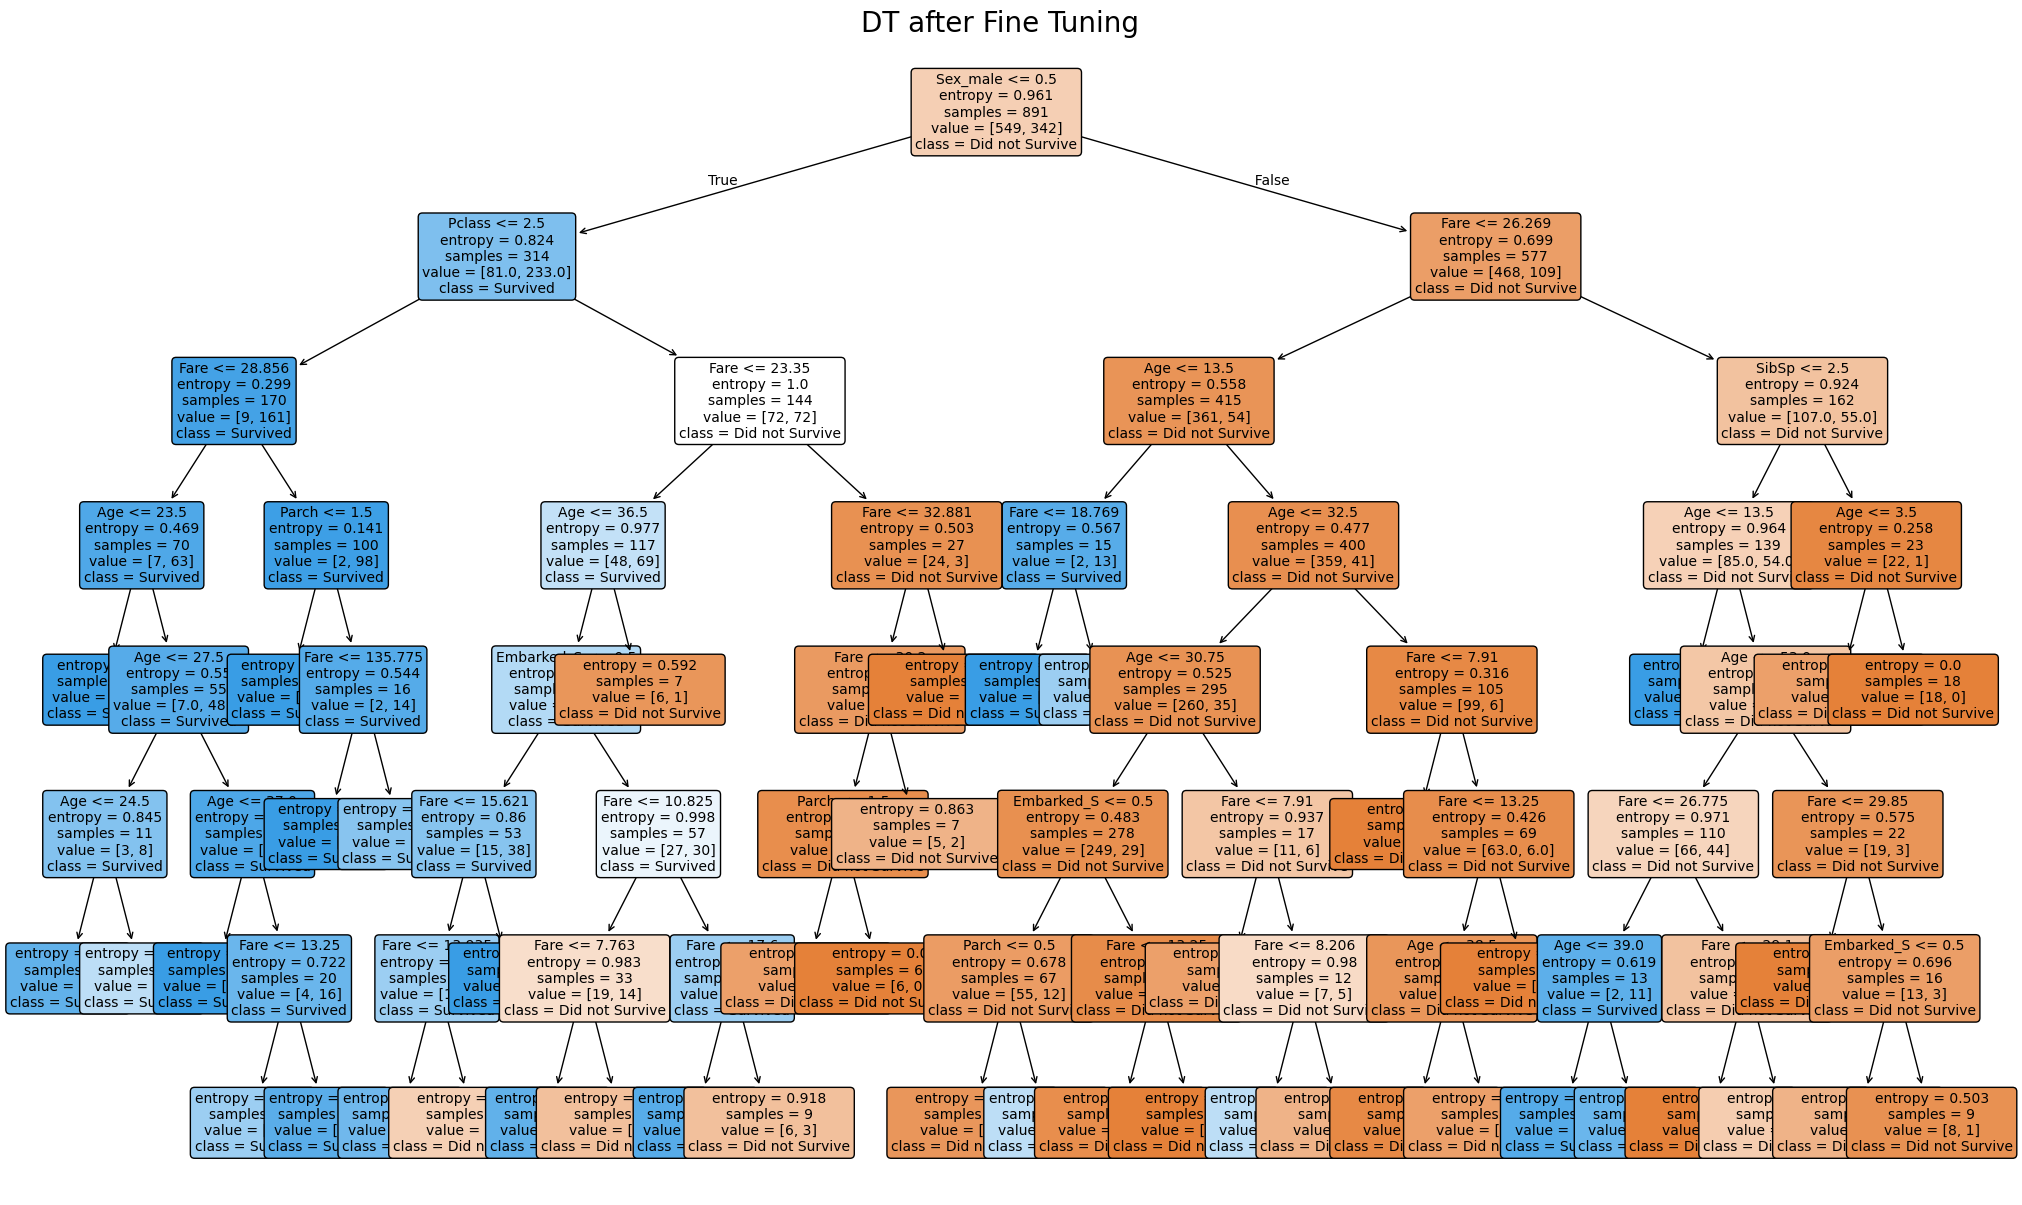

In [17]:
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X, y)
best_dt = dt_grid_search.best_estimator_
print(f"Decision Tree parameters ( best ): {dt_grid_search.best_params_}")
plt.figure(figsize=(25, 15))
plot_tree(best_dt, 
          feature_names=X.columns.tolist(), 
          class_names=['Did not Survive', 'Survived'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("DT after Fine Tuning", fontsize=20)
plt.show()

Q3

In [18]:
dt_cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')
print("\nDT evaluation")
print(f"Scores ( for 5 fold ): {dt_cv_scores}")
print(f"Avg 5 fold CV Accuracy (DT): {np.mean(dt_cv_scores):.4f}")


DT evaluation
Scores ( for 5 fold ): [0.81564246 0.81460674 0.85955056 0.80337079 0.83707865]
Avg 5 fold CV Accuracy (DT): 0.8260


Q4

In [19]:
rf_param_grid = {
    'n_estimators': [100, 200],     
    'max_depth': [5, 10, None],      
    'min_samples_leaf': [1, 2, 4]  
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X, y)
best_rf = rf_grid_search.best_estimator_
print(f"\nRandom forest parameters ( Best one ): {rf_grid_search.best_params_}")
rf_cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print("\nRF Evaluation")
print(f"Scores ( for 5 fold ): {rf_cv_scores}")
print(f"Avg 5 fold CV Accuracy (RF): {np.mean(rf_cv_scores):.4f}")


Random forest parameters ( Best one ): {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}

RF Evaluation
Scores ( for 5 fold ): [0.80446927 0.81460674 0.87640449 0.81460674 0.85393258]
Avg 5 fold CV Accuracy (RF): 0.8328


Task 6

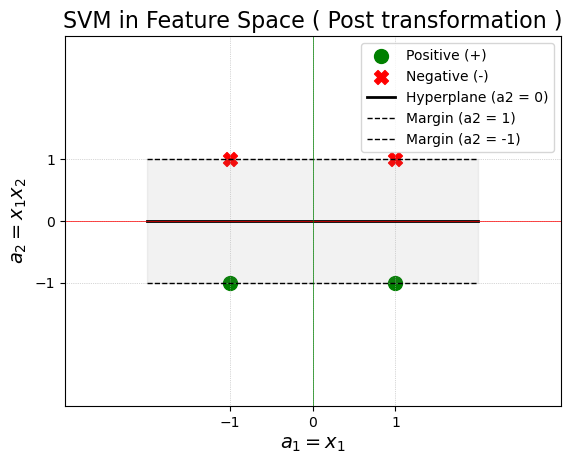

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = {
    'a1': [-1, -1, 1, 1],
    'a2': [1, -1, -1, 1],
    'label': ['Negative (-)', 'Positive (+)', 'Positive (+)', 'Negative (-)']
}
file2 = pd.DataFrame(data)
positive_points = file2[file2['label'] == 'Positive (+)']
negative_points = file2[file2['label'] == 'Negative (-)']
plt.scatter(positive_points['a1'], positive_points['a2'], color='green', marker='o', s=100, label='Positive (+)')
plt.scatter(negative_points['a1'], negative_points['a2'], color='red', marker='X', s=100, label='Negative (-)')
z1_line = np.linspace(-2, 2, 100)
plt.plot(z1_line, np.zeros(z1_line.shape), 'k-', lw=2, label='Hyperplane (a2 = 0)')
plt.plot(z1_line, np.ones(z1_line.shape), 'k--', lw=1, label='Margin (a2 = 1)')
plt.plot(z1_line, -np.ones(z1_line.shape), 'k--', lw=1, label='Margin (a2 = -1)')
plt.fill_between(z1_line, -1, 1, color='gray', alpha=0.1)
plt.xlabel('$a_1 = x_1$', fontsize=14)
plt.ylabel('$a_2 = x_1 x_2$', fontsize=14)
plt.title('SVM in Feature Space ( Post transformation )', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='red', linewidth=0.5)
plt.axvline(0, color='green', linewidth=0.5)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend(loc='upper right')